# Matin Ghorbani 6.8.Assignment
---

## Import Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import Adam, Nadam
from keras.activations import sigmoid, relu, linear
from keras.losses import mae
from keras.src.callbacks import History

In [4]:
dataset = pd.read_csv('../datasets/House/train.csv')
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
test_dataset = dataset[['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                        'FullBath', 'HalfBath', 'GarageCars', 'GarageArea', 'GrLivArea', 'TotRmsAbvGrd', 'SalePrice']]

test_dataset.head(10)

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,GarageCars,GarageArea,GrLivArea,TotRmsAbvGrd,SalePrice
0,7,5,2003,2003,196.0,856,856,854,2,1,2,548,1710,8,208500
1,6,8,1976,1976,0.0,1262,1262,0,2,0,2,460,1262,6,181500
2,7,5,2001,2002,162.0,920,920,866,2,1,2,608,1786,6,223500
3,7,5,1915,1970,0.0,756,961,756,1,0,3,642,1717,7,140000
4,8,5,2000,2000,350.0,1145,1145,1053,2,1,3,836,2198,9,250000
5,5,5,1993,1995,0.0,796,796,566,1,1,2,480,1362,5,143000
6,8,5,2004,2005,186.0,1686,1694,0,2,0,2,636,1694,7,307000
7,7,6,1973,1973,240.0,1107,1107,983,2,1,2,484,2090,7,200000
8,7,5,1931,1950,0.0,952,1022,752,2,0,2,468,1774,8,129900
9,5,6,1939,1950,0.0,991,1077,0,1,0,1,205,1077,5,118000


In [6]:
test_dataset.corr()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,GarageCars,GarageArea,GrLivArea,TotRmsAbvGrd,SalePrice
OverallQual,1.000000,-0.091932,0.572323,0.550684,0.411876,0.537808,0.476224,0.295493,0.550600,0.273458,0.600671,0.562022,0.593007,0.427452,0.790982
OverallCond,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.171098,-0.144203,0.028942,-0.194149,-0.060769,-0.185758,-0.151521,-0.079686,-0.057583,-0.077856
YearBuilt,0.572323,-0.375983,1.000000,0.592855,0.315707,0.391452,0.281986,0.010308,0.468271,0.242656,0.537850,0.478954,0.199010,0.095589,0.522897
YearRemodAdd,0.550684,0.073741,0.592855,1.000000,0.179618,0.291066,0.240379,0.140024,0.439046,0.183331,0.420622,0.371600,0.287389,0.191740,0.507101
MasVnrArea,0.411876,-0.128101,0.315707,0.179618,1.000000,0.363936,0.344501,0.174561,0.276833,0.201444,0.364204,0.373066,0.390857,0.280682,0.477493
TotalBsmtSF,0.537808,-0.171098,0.391452,0.291066,0.363936,1.000000,0.819530,-0.174512,0.323722,-0.048804,0.434585,0.486665,0.454868,0.285573,0.613581
1stFlrSF,0.476224,-0.144203,0.281986,0.240379,0.344501,0.819530,1.000000,-0.202646,0.380637,-0.119916,0.439317,0.489782,0.566024,0.409516,0.605852
2ndFlrSF,0.295493,0.028942,0.010308,0.140024,0.174561,-0.174512,-0.202646,1.000000,0.421378,0.609707,0.183926,0.138347,0.687501,0.616423,0.319334
FullBath,0.550600,-0.194149,0.468271,0.439046,0.276833,0.323722,0.380637,0.421378,1.000000,0.136381,0.469672,0.405656,0.630012,0.554784,0.560664
HalfBath,0.273458,-0.060769,0.242656,0.183331,0.201444,-0.048804,-0.119916,0.609707,0.136381,1.000000,0.219178,0.163549,0.415772,0.343415,0.284108


In [13]:
custom_dataset = test_dataset[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
                               '1stFlrSF', 'FullBath', 'GarageCars', 'GarageArea', 'GrLivArea', 'TotRmsAbvGrd']]
custom_dataset.head(10)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,FullBath,GarageCars,GarageArea,GrLivArea,TotRmsAbvGrd
0,7,2003,2003,856,856,2,2,548,1710,8
1,6,1976,1976,1262,1262,2,2,460,1262,6
2,7,2001,2002,920,920,2,2,608,1786,6
3,7,1915,1970,756,961,1,3,642,1717,7
4,8,2000,2000,1145,1145,2,3,836,2198,9
5,5,1993,1995,796,796,1,2,480,1362,5
6,8,2004,2005,1686,1694,2,2,636,1694,7
7,7,1973,1973,1107,1107,2,2,484,2090,7
8,7,1931,1950,952,1022,2,2,468,1774,8
9,5,1939,1950,991,1077,1,1,205,1077,5


In [14]:
custom_dataset.isnull().sum().reset_index()

,index,0
0,OverallQual,0
1,YearBuilt,0
2,YearRemodAdd,0
3,TotalBsmtSF,0
4,1stFlrSF,0
5,FullBath,0
6,GarageCars,0
7,GarageArea,0
8,GrLivArea,0
9,TotRmsAbvGrd,0


## Implement a neural network model for predict house sales prices

### Split train data to train (%80) and validation (%20)

In [20]:
X_train = custom_dataset.values
Y_train = test_dataset[['SalePrice']].values

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1168, 10), (292, 10), (1168, 1), (292, 1))

In [29]:
model = Sequential([
    Dense(len(custom_dataset.columns), activation=relu),
    Dense(64, activation=relu),
    Dense(32, activation=relu),
    Dense(1, activation=linear)
])

In [30]:
model.compile(optimizer=Adam(), loss=mae)

In [31]:
output: History = model.fit(x_train, y_train, epochs=100)

Epoch 1/100


37/37 [==============================] - 1s 1ms/step - loss: 180693.3438
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 169016.2500
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 116304.1484
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 45553.5039
Epoch 5/100
37/37 [==============================] - 0s 1ms/step - loss: 42140.6250
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 41124.5195
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 40212.1250
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 39329.9609
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 38426.9102
Epoch 10/100
37/37 [==============================] - 0s 1ms/step - loss: 37744.6133
Epoch 11/100
37/37 [==============================] - 0s 1ms/step - loss: 36739.5742
Epoch 12/100
37/37 [==============================] - 0s 2ms/step - loss: 35897.468

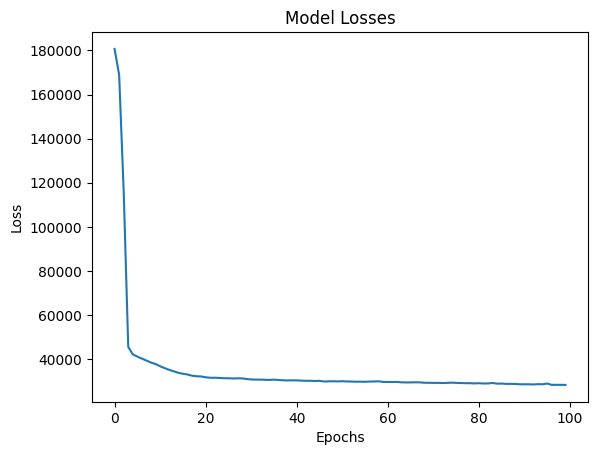

In [32]:
plt.plot(output.history['loss'])
plt.title('Model Losses')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Evaluate our trained model on validation data (We should achieve an loss < $50000)

In [34]:
loss = model.evaluate(x_test, y_test)
loss

10/10 [==============================] - 0s 770us/step - loss: 25647.9785


25647.978515625

### Predict yourself house price with our trained model

In [35]:
my_house = {
    'OverallQual': 10,
    'YearBuilt': 2014, 
    'YearRemodAdd': 2020, 
    'TotalBsmtSF': 0,
    '1stFlrSF': 172, 
    'FullBath': 1, 
    'GarageCars': 6, 
    'GarageArea': 70, 
    'GrLivArea': 9, 
    'TotRmsAbvGrd': 3
}

In [48]:
my_house_detail = np.array([my_house['OverallQual'], my_house['YearBuilt'], my_house['YearRemodAdd'], my_house['TotalBsmtSF'], my_house['1stFlrSF'],
         my_house['FullBath'], my_house['GarageCars'], my_house['GarageArea'], my_house['GrLivArea'], my_house['TotRmsAbvGrd']])

my_house_detail = np.expand_dims(my_house_detail, axis=0)

In [50]:
my_house_price = model.predict(my_house_detail)
my_house_price[0][0]

1/1 [==============================] - 0s 14ms/step


46497.434

## Save our trained model as a *.h5 extension file

In [51]:
model.save('House_Prices.h5')

/home/matin/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Submit our model to kaggle competitions

In [5]:
model: Sequential = load_model('./House_Prices.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 64)                704       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2927 (11.43 KB)
Trainable params: 2927 (11.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
test_data = pd.read_csv('../datasets/House/test.csv')
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [8]:
custom_dataset = test_data[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
                               '1stFlrSF', 'FullBath', 'GarageCars', 'GarageArea', 'GrLivArea', 'TotRmsAbvGrd']]
custom_dataset.head(10)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,FullBath,GarageCars,GarageArea,GrLivArea,TotRmsAbvGrd
0,5,1961,1961,882.0,896,1,1.0,730.0,896,5
1,6,1958,1958,1329.0,1329,1,1.0,312.0,1329,6
2,5,1997,1998,928.0,928,2,2.0,482.0,1629,6
3,6,1998,1998,926.0,926,2,2.0,470.0,1604,7
4,8,1992,1992,1280.0,1280,2,2.0,506.0,1280,5
5,6,1993,1994,763.0,763,2,2.0,440.0,1655,7
6,6,1992,2007,1168.0,1187,2,2.0,420.0,1187,6
7,6,1998,1998,789.0,789,2,2.0,393.0,1465,7
8,7,1990,1990,1300.0,1341,1,2.0,506.0,1341,5
9,4,1970,1970,882.0,882,1,2.0,525.0,882,4


In [13]:
custom_dataset.isnull().sum().reset_index()

,index,0
0,OverallQual,0
1,YearBuilt,0
2,YearRemodAdd,0
3,TotalBsmtSF,1
4,1stFlrSF,0
5,FullBath,0
6,GarageCars,1
7,GarageArea,1
8,GrLivArea,0
9,TotRmsAbvGrd,0


In [17]:
custom_dataset['TotalBsmtSF'].fillna(custom_dataset['TotalBsmtSF'].mean(), inplace=True)
custom_dataset['GarageCars'].fillna(custom_dataset['GarageCars'].mean(), inplace=True)
custom_dataset['GarageArea'].fillna(custom_dataset['GarageArea'].mean(), inplace=True)
custom_dataset.isnull().sum().reset_index()

/tmp/ipykernel_10596/1936689927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custom_dataset['TotalBsmtSF'].fillna(custom_dataset['TotalBsmtSF'].mean(), inplace=True)
/tmp/ipykernel_10596/1936689927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custom_dataset['GarageCars'].fillna(custom_dataset['GarageCars'].mean(), inplace=True)
/tmp/ipykernel_10596/1936689927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custom_data

,index,0
0,OverallQual,0
1,YearBuilt,0
2,YearRemodAdd,0
3,TotalBsmtSF,0
4,1stFlrSF,0
5,FullBath,0
6,GarageCars,0
7,GarageArea,0
8,GrLivArea,0
9,TotRmsAbvGrd,0


In [19]:
predictions = model.predict(custom_dataset)

# Create a DataFrame with predictions
result_df = pd.DataFrame(predictions, columns=['SalePrice'])

# Save predictions to a CSV file
result_df.to_csv('predictions.csv', index=False)

46/46 [==============================] - 0s 607us/step
